In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble


In [3]:
data = pd.read_csv('df_encoded.csv')

In [4]:
N = data.size

In [5]:
print(data.head())

   Unnamed: 0     ID ClientId  Group  Score  HasUserStory  UseCases  \
0           0  25926    OYBBZ    OYI      3          True         1   
1           1  25922    OYBBZ    OYI      3          True         1   
2           2  23570      ZQL    ZQL      3         False         0   
3           3  34287    OYBBZ    OYF      2         False         0   
4           4  30019    CERQV  CERQV      2          True         1   

   ContentLength  TimeSpent  TimeToStart          ...           \
0           1322       6.25       119.55          ...            
1           1103       7.25       958.03          ...            
2             52       2.00       141.88          ...            
3            497       6.50       620.95          ...            
4            702       6.25      3813.15          ...            

   ApplicationType_HARDWARE  ApplicationType_IOT  ApplicationType_MOBILE  \
0                         0                    0                       0   
1                       

In [6]:
print(data.describe())

       Unnamed: 0            ID        Score     UseCases  ContentLength  \
count  7112.00000   7112.000000  7112.000000  7112.000000    7112.000000   
mean   3555.50000  23260.624297     3.316789     0.507733     623.679556   
std    2053.20189   6326.461814     1.858717     1.155811     885.788459   
min       0.00000  10000.000000     1.000000     0.000000       0.000000   
25%    1777.75000  18663.250000     3.000000     0.000000     146.000000   
50%    3555.50000  23111.500000     3.000000     0.000000     331.000000   
75%    5333.25000  28548.250000     3.000000     1.000000     752.000000   
max    7111.00000  34742.000000    40.000000    17.000000   13921.000000   

         TimeSpent   TimeToStart     TeamSize  Industry_Business Services  \
count  7112.000000   7112.000000  7112.000000                 7112.000000   
mean      8.996219   1010.744176     2.799494                    0.023763   
std      17.050132   1994.167641     1.442864                    0.152320   
min    

In [38]:
# correlation
# corr = data.corr()
# sns.heatmap(corr, annot=True)    
# plt.show()

In [6]:
print(data.columns.values)

['Unnamed: 0' 'ID' 'ClientId' 'Group' 'Score' 'HasUserStory' 'UseCases'
 'ContentLength' 'TimeSpent' 'TimeToStart' 'InNormalRange' 'TeamSize'
 'Industry_Business Services' 'Industry_Consumer Services'
 'Industry_Education' 'Industry_Financial Services' 'Industry_Government'
 'Industry_Health, Pharmaceuticals, and Biotech' 'Industry_Manufacturing'
 'Industry_Media and Entertainment' 'Industry_Non-profit'
 'Industry_Retail' 'Industry_Software and Internet'
 'Industry_Travel Recreation and Leisure' 'Industry_Unknown'
 'RequestMonth_April' 'RequestMonth_August' 'RequestMonth_December'
 'RequestMonth_February' 'RequestMonth_January' 'RequestMonth_July'
 'RequestMonth_June' 'RequestMonth_March' 'RequestMonth_May'
 'RequestMonth_November' 'RequestMonth_October' 'RequestMonth_September'
 'CompleteMonth_April' 'CompleteMonth_August' 'CompleteMonth_December'
 'CompleteMonth_February' 'CompleteMonth_January' 'CompleteMonth_July'
 'CompleteMonth_June' 'CompleteMonth_March' 'CompleteMonth_May'
 'Co

In [6]:
y = data['InNormalRange_binary']
X = data.drop(['ID', 'ClientId', 'Group','InNormalRange','InNormalRange_binary'], axis = 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:

from sklearn.ensemble import RandomForestClassifier
# Random forest accuracy
def RFavg(ne, md):
    clf = RandomForestClassifier(n_estimators = ne, max_depth = md, random_state = 0)
    print("Inside RF:", ne)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    scores_avg = sum(scores)/len(scores)
    return scores_avg
    # print(data.ix[:,-3].head())
    # print(X.columns.values)
#     clf.fit(X, y)
    # imp = list(zip(X.columns.values, clf.feature_importances_))
#     imp = pd.DataFrame(clf.feature_importances_,index = X.columns.values)
#     print(imp)
#     imp.plot(kind='barh')
    # plt.show()
    # features = X.column.values
    # importances = clf.feature_importances_
    # indices = np.argsort()
    # f = pd.DataFrame()
    # print(clf.best_estimator_.features_importances_)
    # print(clf.predict)
    # print(clf.predict([[0, 0, 0, 0]]))
    # print(y.head())
    # print(X.head())
    # print(len(y))
    # print(data.columns.values)
    # print(X.columns.values)


In [65]:
holdavg = []
for i in range (5,100,5):
    holdavg.append(RFavg(i,i))
print(holdavg)

Inside RF: 5
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
Inside RF: 50
Inside RF: 55
Inside RF: 60
Inside RF: 65
Inside RF: 70
Inside RF: 75
Inside RF: 80
Inside RF: 85
Inside RF: 90
Inside RF: 95
[0.7038086562326599, 0.7846168827786804, 0.7891280833438501, 0.798686953418229, 0.7877396095627478, 0.7978418791005805, 0.7940503385521174, 0.7918001839161202, 0.7927928240439333, 0.7944772212662501, 0.8012235385479329, 0.8002372285356444, 0.8002374255170874, 0.7977083484964529, 0.7958805270822774, 0.7977037973348077, 0.7968646613955768, 0.7963004898494461, 0.7998152848251507]


In [63]:
# Random forest precision
def RFpre(ne, md):
    clf = RandomForestClassifier(n_estimators = ne, max_depth = md, random_state = 0)
    print("Inside RF:", ne)
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'precision')
    scores_avg = sum(scores)/len(scores)
    return scores_avg


In [66]:
holdpre = []
for i in range (5,100,5):
    holdpre.append(RFpre(i,i))
print(holdpre)

Inside RF: 5
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
Inside RF: 50
Inside RF: 55
Inside RF: 60
Inside RF: 65
Inside RF: 70
Inside RF: 75
Inside RF: 80
Inside RF: 85
Inside RF: 90
Inside RF: 95
[0.6768933025638664, 0.7572349886750472, 0.7727589894058428, 0.7819082058394271, 0.7737893608613132, 0.7960581982488565, 0.7815690404774371, 0.785778312194018, 0.7793728286018211, 0.7900856352382422, 0.7920307089540308, 0.796853455879662, 0.7908675750288161, 0.7914262904624433, 0.7871486184780813, 0.7925795820597317, 0.7866606283090645, 0.7884692694768917, 0.7903570404943348]


In [67]:
# constant max depth 
holdavgmd20 = []
for i in range (5,100,5):
    holdavgmd20.append(RFavg(i,20))
print(holdavgmd20)

Inside RF: 5
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
Inside RF: 50
Inside RF: 55
Inside RF: 60
Inside RF: 65
Inside RF: 70
Inside RF: 75
Inside RF: 80
Inside RF: 85
Inside RF: 90
Inside RF: 95
[0.7572407201151885, 0.785469078476294, 0.807130531812058, 0.798686953418229, 0.8009454157744076, 0.8054380155043315, 0.8048787885262871, 0.8010803213535229, 0.7988254163486584, 0.8086639922818886, 0.8095076766005409, 0.8069762235608057, 0.8054318723542442, 0.8045901656402489, 0.7999523672161448, 0.7971386325347906, 0.796436187249447, 0.7974197311748619, 0.7984044592147139]


In [68]:
# constant n_estimators 
holdavgne20 = []
for i in range (5,100,5):
    holdavgne20.append(RFavg(20,i))
print(holdavgne20)

Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
Inside RF: 20
[0.7675999636307708, 0.7892612116384206, 0.7791512297762936, 0.798686953418229, 0.786885048418484, 0.7988236401770028, 0.7905266449119026, 0.7872933442084896, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549, 0.7875754299815549]


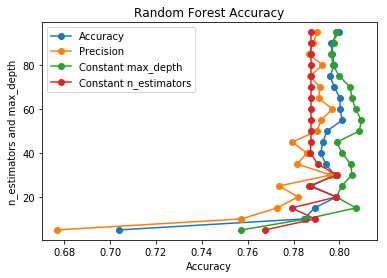

In [70]:
md_ne_for_avg = [i for i in range(5,100,5)]
# print((md_ne_for_avg))
plt.plot(holdavg,md_ne_for_avg,'-o',label = 'Accuracy')
plt.plot(holdpre,md_ne_for_avg,'-o',label = 'Precision')
plt.plot(holdavgmd20,md_ne_for_avg,'-o',label = 'Constant max_depth')
plt.plot(holdavgne20,md_ne_for_avg,'-o',label = 'Constant n_estimators')
plt.xlabel('Accuracy')
plt.ylabel('n_estimators and max_depth')
plt.title('Random Forest Accuracy')
plt.legend()

In [81]:
from sklearn.svm import SVC
def svc():
    clf = SVC(gamma = 'auto')
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
    print(scores)
#     scores = cross_val_score(clf, X, y, cv = 10, scoring = 'precision')
#     scores_avgp = sum(scores)/len(scores)
    return scores_avga
print(svc())

[0.59831461 0.59831461 0.59691011 0.59691011 0.59831461 0.59915612
 0.59634318 0.59859155 0.59859155 0.59859155]
0.5980037989596265


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def lda():
    clf = LinearDiscriminantAnalysis()
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
    print(scores)
    return scores_avga
print(lda())

D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: User

[0.59550562 0.5744382  0.56741573 0.57303371 0.63061798 0.72151899
 0.64275668 0.62112676 0.65492958 0.61830986]
0.6199653101211291


D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\ana\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [38]:
from sklearn import ensemble
# Boosting with learning rate 0.1
def Bag01(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=0.1)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X, y)
    # predict on test
    predicted = clf.predict(X_test)
    # check accuracy for tested results
    tester = accuracy_score(y_test, predicted)
    return scores_avg, tester

In [40]:
holdbagavg = []
holdbagavgt = []
# te,tr = 0.
for i in range (2,9):
    tr,te = Bag01(i)
    holdbagavg.append(tr)
    holdbagavgt.append(te)
for i in range (10,50,5):
    tr,te = Bag01(i)
    holdbagavg.append(tr)
    holdbagavgt.append(te)
print(holdbagavg,holdbagavgt)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
[0.6025188965615456, 0.6025188965615456, 0.8199318357905515, 0.8356802124549721, 0.861070005750254, 0.9143701934867261, 0.9372535143369735, 0.9531961491209466, 0.9737610546442201, 0.9838384910554838, 0.9905559023693687, 0.9918155257155625, 0.9909756300088521, 0.9909760685938016, 0.9903453779080117] [0.5896889646357052, 0.5896889646357052, 0.8052833404345974, 0.8598210481465701, 0.8653600340860673, 0.9011504047720494, 0.9066893907115466, 0.9552620366425224, 0.9701746910950149, 0.9850873455475074, 0.9936088623775032, 0.9965913932680017, 0.9987217724755006, 0.9991478483170004, 1.0]


In [41]:
from sklearn.metrics import accuracy_score
# Boosting with learning rate 1.0
def Bag10(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=1.0)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X, y)
    # predict on test
    predicted = clf.predict(X_test)
    # check accuracy for tested results
    tester = accuracy_score(y_test, predicted)
    return scores_avg, tester

In [42]:
holdbagavg10 = []
holdbagavg10t = []
for i in range (2,9):
    tr, te = Bag10(i)
    holdbagavg10.append(tr)
    holdbagavg10t.append(te)
for i in range (10,50,5):
    tr, te = Bag10(i)
    holdbagavg10.append(tr)
    holdbagavg10t.append(te)
print(holdbagavg10, holdbagavg10t)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
[0.8002059414329137, 0.8365091103676543, 0.920872668690644, 0.9414455037560933, 0.9620152724124834, 0.9750250822678483, 0.9802701436354653, 0.9859375733662326, 0.9869888725469927, 0.9899265274384274, 0.9897164470904016, 0.989926087010684, 0.9901366114720407, 0.9890875107444099, 0.9897164452476079] [0.7818491691521091, 0.8389433319130806, 0.8824030677460588, 0.9429058372390285, 0.9744354495100128, 0.9778440562420111, 0.9863655730720068, 0.9944610140605028, 0.9995739241585002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [44]:
# Boosting with learning rate 0.1 subsample 0.5
def Bag0105(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=0.1, subsample = 0.5)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X, y)
    # predict on test
    predicted = clf.predict(X_test)
    # check accuracy for tested results
    tester = accuracy_score(y_test, predicted)
    return scores_avg, tester

In [46]:
holdbagavg0105 = []
holdbagavg0105t = []
for i in range (2,9):
    tr, te = Bag0105(i)
    holdbagavg0105.append(tr)
    holdbagavg0105t.append(te)
for i in range (10,50,5):
    tr, te = Bag0105(i)
    holdbagavg0105.append(tr)
    holdbagavg0105t.append(te)
print(holdbagavg0105,holdbagavg0105t)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
[0.6025188965615456, 0.6025188965615456, 0.8155213923678994, 0.8339951395942181, 0.8612809706393543, 0.9068159749887167, 0.9322097431904528, 0.9500497333219228, 0.9710330470442432, 0.9796416495600109, 0.9867774690729426, 0.9890853141340745, 0.9897160048198643, 0.9899247694130414, 0.9907655459752386] [0.5896889646357052, 0.5896889646357052, 0.8044311887515978, 0.8530038346825735, 0.8598210481465701, 0.9135066041755433, 0.9331060928845335, 0.9369407754580316, 0.9718789944610141, 0.9893481039625053, 0.9931827865360034, 0.9944610140605028, 0.9965913932680017, 0.9982956966340009, 0.9995739241585002]


In [47]:
# Boosting with learning rate 1.0 subsample 0.5
def Bag1005(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=1.0, subsample = 0.5)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X, y)
    # predict on test
    predicted = clf.predict(X_test)
    # check accuracy for tested results
    tester = accuracy_score(y_test, predicted)
    return scores_avg, tester

In [48]:
holdbagavg1005 = []
holdbagavg1005t = []
for i in range (2,9):
    tr, te = Bag1005(i)
    holdbagavg1005.append(tr)
    holdbagavg1005t.append(te)
for i in range (10,50,5):
    tr, te = Bag1005(i)
    holdbagavg1005.append(tr)
    holdbagavg1005t.append(te)
print(holdbagavg1005,holdbagavg1005t)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 10
Inside RF: 15
Inside RF: 20
Inside RF: 25
Inside RF: 30
Inside RF: 35
Inside RF: 40
Inside RF: 45
[0.8054593635564802, 0.843851473907107, 0.8939973144595855, 0.9353526466242927, 0.9550710666098498, 0.973129492316913, 0.9767026825993155, 0.9769167194258562, 0.9722966287117462, 0.9735540499192229, 0.9672563828299667, 0.9735584505110694, 0.9754439290518448, 0.9788008729978136, 0.9758649779745587] [0.7818491691521091, 0.8389433319130806, 0.8968896463570516, 0.9186195142735407, 0.9412015338730294, 0.9838091180230081, 0.9842351938645079, 0.9910524073285045, 0.9948870899020026, 0.9965913932680017, 0.9970174691095015, 0.9995739241585002, 0.9974435449510013, 0.9995739241585002, 0.9991478483170004]


[2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35, 40, 45]


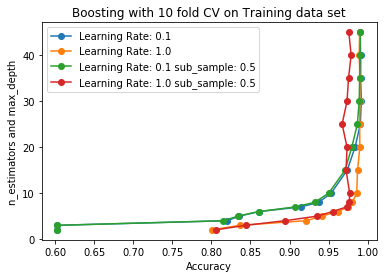

In [50]:
bag = [i for i in range(2,9)]+[i for i in range(10,50,5)]
print(bag)
# print((md_ne_for_avg))
plt.plot(holdbagavg,bag,'-o',label = 'Learning Rate: 0.1')
plt.plot(holdbagavg10,bag,'-o',label = 'Learning Rate: 1.0')
plt.plot(holdbagavg0105,bag,'-o',label = 'Learning Rate: 0.1 sub_sample: 0.5')
plt.plot(holdbagavg1005,bag,'-o',label = 'Learning Rate: 1.0 sub_sample: 0.5')
plt.xlabel('Accuracy')
plt.ylabel('n_estimators and max_depth')
plt.title('Boosting with 10 fold CV on Training data set')
plt.legend()

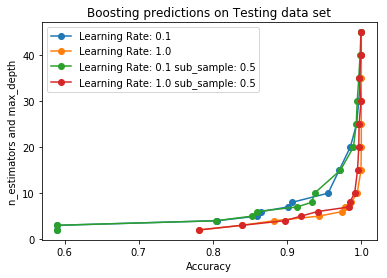

In [51]:
plt.plot(holdbagavgt,bag,'-o',label = 'Learning Rate: 0.1')
plt.plot(holdbagavg10t,bag,'-o',label = 'Learning Rate: 1.0')
plt.plot(holdbagavg0105t,bag,'-o',label = 'Learning Rate: 0.1 sub_sample: 0.5')
plt.plot(holdbagavg1005t,bag,'-o',label = 'Learning Rate: 1.0 sub_sample: 0.5')
plt.xlabel('Accuracy')
plt.ylabel('n_estimators and max_depth')
plt.title('Boosting predictions on Testing data set')
plt.legend()

In [17]:
    clf = ensemble.GradientBoostingClassifier(n_estimators = 7, max_depth = 7, max_leaf_nodes = 7, random_state = 0, learning_rate=1.0)
#     print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    print(scores_avg)
    # prepare for test
    clf.fit(X_train, y_train)
#     # predict on test
    predicted = clf.predict(X_test)
    # check accuracy for tested results
    tester = accuracy_score(y_test, predicted)
    print(tester)

0.9750250822678483
0.9701746910950149


In [24]:
# deployer
import pickle
from joblib import dump, load
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
dump(clf, 'deploy.joblib') 
# print(testdump)

['deploy.joblib']